In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import plotly.express as px
import plotly.graph_objects as go

# Load the CSV files as DataFrames
compstak_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak.csv')

In [2]:
doe_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\src\DOE.csv')

In [3]:
compstak_df

,Property Type,Property Subtype,Property Id,State
0,Retail,Parking,1,NY
1,Retail,Apartments,2,NY
2,Office,NaN,3,NY
3,Retail,NaN,4,NY
4,Office,Mixed-Use,5,NY
...,...,...,...,...
759618,NaN,NaN,3611385,NY
759619,Industrial,Flex/R&D,3611389,FL
759620,Industrial,Flex/R&D,3611390,FL
759621,NaN,NaN,3611391,CA


In [4]:
doe_df

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category
0,CT,Flex,Light Manufacturing,Industrial
1,CT,Industrial,Warehouse,Industrial
2,CT,Industrial,NaN,Industrial
3,CT,Multi-Family,Apartments,Multi-Family
4,CT,Multi-Family,Apartments,Multi-Family
...,...,...,...,...
2246480,WI,Retail,Storefront Retail/Office,Retail
2246481,WI,Retail,Storefront Retail/Office,Retail
2246482,WI,Retail,NaN,Retail
2246483,WI,Retail,NaN,Retail


In [5]:
#show me Mixed-Use propety type entries in the compstak_df show me unique entries in property subtype
mixed_use_df = compstak_df[compstak_df['Property Type'] == 'Mixed-Use']
mixed_use_df['Property Subtype'].unique()


array(['Street Retail/Storefront', 'Mixed-Use', 'Condominium',
       'Educational/School', nan, 'General Retail', 'Apartments',
       'Super-Regional Center/Mall', 'Shopping Centers',
       'Medical/Healthcare', 'Community/Recreation Center',
       'Business Park', 'Flex/R&D', 'Hospitality Related',
       'Department Store', 'Parking', 'Life Science/Lab',
       'Warehouse/Distribution', 'Municipality/Public Service',
       'Sports & Recreation', 'Restaurant/Bar', 'Student Housing',
       'Creative', 'Vacant Land', 'Self-Storage',
       'Neighborhood Shopping Center', 'Special Purpose',
       'Financial Building', 'Assembly/Meeting Place',
       'Convenience/Strip Center', 'Community Shopping Center',
       'Fuel & Service Station', 'Light Industrial',
       'Refrigerated/Cold Storage', 'Automotive', 'Freestanding',
       'Special Industrial', 'Manufacturing', 'Showroom',
       'Mobile Home Park'], dtype=object)

In [6]:

mixed_use_df = compstak_df[compstak_df['Property Type'] == 'Land']
mixed_use_df['Property Subtype'].unique()

array(['Vacant Land', 'Hospitality Related', 'Flex/R&D', nan,
       'Light Industrial', 'Financial Building',
       'Super-Regional Center/Mall', 'Parking', 'Apartments',
       'Communication/Data Center', 'General Retail', 'Life Science/Lab',
       'Warehouse/Distribution', 'Automotive', 'Showroom',
       'Fuel & Service Station', 'Medical/Healthcare', 'Condominium',
       'Freestanding', 'Mixed-Use', 'Restaurant/Bar', 'Transportation',
       'Industrial Outdoor Storage', 'Self-Storage', 'Special Industrial',
       'Neighborhood Shopping Center', 'Community Shopping Center',
       'Heavy Industrial', 'Educational/School', 'Outlet',
       'Department Store', 'Municipality/Public Service',
       'Sports & Recreation', 'Manufacturing', 'Mobile Home Park',
       'Convenience/Strip Center', 'Drive Thru', 'Funeral/Mortuary',
       'Shopping Centers', 'Student Housing', 'Assembly/Meeting Place',
       'Bank', 'Business Park', 'Special Purpose', 'Under Construction',
       'Day

In [7]:
doe_df

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category
0,CT,Flex,Light Manufacturing,Industrial
1,CT,Industrial,Warehouse,Industrial
2,CT,Industrial,NaN,Industrial
3,CT,Multi-Family,Apartments,Multi-Family
4,CT,Multi-Family,Apartments,Multi-Family
...,...,...,...,...
2246480,WI,Retail,Storefront Retail/Office,Retail
2246481,WI,Retail,Storefront Retail/Office,Retail
2246482,WI,Retail,NaN,Retail
2246483,WI,Retail,NaN,Retail


In [8]:
doe_df.loc[
    (doe_df['compstak_equivalent_category'] == 'Unmapped') & 
    (doe_df['reported_propertytype'] == 'Specialty'), 
    'compstak_equivalent_category'
] = 'Other'


In [9]:
doe_df.loc[
    (doe_df['reported_propertytype'] == 'Flex') & 
    (doe_df['compstak_equivalent_category'] == 'Unmapped'), 
    'compstak_equivalent_category'
] = 'Industrial'

In [10]:
doe_df.loc[
    (doe_df['reported_propertytype'] == 'Health Care') & 
    (doe_df['compstak_equivalent_category'] == 'Unmapped'), 
    'compstak_equivalent_category'
] = 'Other'

In [11]:
unique_categories = doe_df['compstak_equivalent_category'].unique()
unique_categories

array(['Industrial', 'Multi-Family', 'Office', 'Retail', 'Other', 'Hotel'],
      dtype=object)

In [12]:
# show me all unique entries in unmapped_rows reported_propertytype
unmapped_rows = doe_df[doe_df['compstak_equivalent_category'] == 'Unmapped']
unmapped_rows['reported_propertytype'].unique()

array([], dtype=object)

In [13]:
unmapped_rows = doe_df[doe_df['compstak_equivalent_category'] == 'Unmapped']
unmapped_rows

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category


In [14]:
# Create the sunburst visualization without requiring a full merge
# First, count the occurrences of each category in both datasets
doe_category_counts = doe_df['compstak_equivalent_category'].value_counts().reset_index()
doe_category_counts.columns = ['compstak_equivalent_category', 'count']
compstak_property_counts = compstak_df['Property Type'].value_counts().reset_index()
compstak_property_counts.columns = ['Property Type', 'count']

# Print the size of each dataset to understand the dimensions
print(f"DOE dataset size: {len(doe_df)} rows")
print(f"CompStak dataset size: {len(compstak_df)} rows")
print(f"DOE unique categories: {len(doe_category_counts)}")
print(f"CompStak unique property types: {len(compstak_property_counts)}")

# Find common categories between the two datasets
doe_category_counts['compstak_equivalent_category'] = doe_category_counts['compstak_equivalent_category'].astype(str)
compstak_property_counts['Property Type'] = compstak_property_counts['Property Type'].astype(str)

# Create a small mapping dataframe of common categories
common_categories = set(doe_category_counts['compstak_equivalent_category']).intersection(
    set(compstak_property_counts['Property Type'])
)
print(f"Number of common categories: {len(common_categories)}")

# Create a dataframe for visualization with hierarchy information
sunburst_data = []

# Add DOE categories as first level
for _, row in doe_category_counts.iterrows():
    category = row['compstak_equivalent_category']
    count = row['count']
    # First level - DOE category
    sunburst_data.append({
        'id': category,
        'parent': '',
        'value': count,
        'label': category
    })
    
    # Check if this category exists in CompStak
    if category in common_categories:
        # Add CompStak entries as second level
        matching_compstak = compstak_property_counts[compstak_property_counts['Property Type'] == category]
        for _, cs_row in matching_compstak.iterrows():
            sunburst_data.append({
                'id': f"{category}_{cs_row['Property Type']}",
                'parent': category,
                'value': cs_row['count'],
                'label': cs_row['Property Type']
            })

# Create DataFrame from the assembled data
sunburst_df = pd.DataFrame(sunburst_data)

# Create sunburst chart using the prepared data
fig = go.Figure(go.Sunburst(
    ids=sunburst_df['id'],
    labels=sunburst_df['label'],
    parents=sunburst_df['parent'],
    values=sunburst_df['value'],
    branchvalues='total'
))

fig.update_layout(
    title='CompStak Coverage by Property Type',
    margin=dict(t=30, b=30, l=0, r=0)
)

fig.show()

# Save the figure
fig.write_html("../Images/plots/category_sunburst.html")
fig.write_image("../Images/plots/category_sunburst.png")

DOE dataset size: 2246485 rows
CompStak dataset size: 759623 rows
DOE unique categories: 6
CompStak unique property types: 8
Number of common categories: 6


# Comparison of CompStak Property Type and DOE Equivalent Categories

This visualization compares the distribution of property types in the CompStak dataset versus the equivalent categories in the DOE dataset.

# Mapping CompStak Property Subtypes to DOE-Compliant Property Types

This section maps CompStak property subtypes to DOE-compliant property types based on the provided mapping dictionary.

In [15]:
# Define the mapping from CompStak property subtypes to DOE-compliant property types
property_to_doe_mapping = {
    # Retail
    'Street Retail/Storefront': 'Retail',
    'General Retail': 'Retail',
    'Super-Regional Center/Mall': 'Retail',
    'Shopping Centers': 'Retail',
    'Neighborhood Shopping Center': 'Retail',
    'Convenience/Strip Center': 'Retail',
    'Community Shopping Center': 'Retail',
    'Department Store': 'Retail',
    'Restaurant/Bar': 'Retail',
    'Fuel & Service Station': 'Retail',
    'Freestanding': 'Retail',
    'Automotive': 'Retail',
    'Outlet': 'Retail',
    'Drive Thru': 'Retail',

    # Industrial
    'Warehouse/Distribution': 'Industrial',
    'Light Industrial': 'Industrial',
    'Heavy Industrial': 'Industrial',
    'Refrigerated/Cold Storage': 'Industrial',
    'Manufacturing': 'Industrial',
    'Special Industrial': 'Industrial',
    'Industrial Outdoor Storage': 'Industrial',
    'Flex/R&D': 'Industrial',
    'Processing': 'Industrial',
    'Life Science/Lab': 'Industrial',

    # Office
    'Business Park': 'Office',
    'Professional Building': 'Office',
    'Financial Building': 'Office',
    'Bank': 'Office',
    'Creative': 'Office',

    # Multi-Family
    'Apartments': 'Multi-Family',
    'Student Housing': 'Multi-Family',
    'Mobile Home Park': 'Multi-Family',
    'Condominium': 'Multi-Family',
    'Senior Housing': 'Multi-Family',
    'Housing': 'Multi-Family',

    # Hotel
    'Hospitality Related': 'Hotel',

    # Other
    'Self-Storage': 'Other',
    'Vacant Land': 'Other',
    'Mixed-Use': 'Other',
    'Medical/Healthcare': 'Other',
    'Hospital/Healthcare Facility': 'Other',
    'Day Care Facility': 'Other',
    'Parking': 'Other',
    'Funeral/Mortuary': 'Other',
    'Communication/Data Center': 'Other',
    'Assembly/Meeting Place': 'Other',
    'Municipality/Public Service': 'Other',
    'Educational/School': 'Other',
    'Community/Recreation Center': 'Other',
    'Sports & Recreation': 'Other',
    'Transportation': 'Other',
    'Special Purpose': 'Other',
    'Live/Work': 'Other',
    'Under Construction': 'Other'
}

# Create a copy of the dataframe to preserve the original
compstak_mapped_df = compstak_df.copy()

# First, try to map based on Property Subtype
compstak_mapped_df['DOE_Compliant_Property_Type'] = compstak_mapped_df['Property Subtype'].map(property_to_doe_mapping)

# For entries where mapping by subtype didn't work (resulted in NaN),
# keep the original Property Type if it's already in DOE categories
mask = compstak_mapped_df['DOE_Compliant_Property_Type'].isna()
compstak_mapped_df.loc[mask, 'DOE_Compliant_Property_Type'] = compstak_mapped_df.loc[mask, 'Property Type']

# For any remaining NaN values, set to 'Other'
compstak_mapped_df['DOE_Compliant_Property_Type'].fillna('Other', inplace=True)

# Display the first few rows of the dataframe with the new column
print("First few rows with DOE-compliant property types:")
compstak_mapped_df.head()

First few rows with DOE-compliant property types:


C:\Users\clint\AppData\Local\Temp\ipykernel_4552\2431108958.py:82: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Property Type,Property Subtype,Property Id,State,DOE_Compliant_Property_Type
0,Retail,Parking,1,NY,Other
1,Retail,Apartments,2,NY,Multi-Family
2,Office,NaN,3,NY,Office
3,Retail,NaN,4,NY,Retail
4,Office,Mixed-Use,5,NY,Other


Distribution of DOE-compliant property types in CompStak data:
DOE_Compliant_Property_Type
Retail          195116
Industrial      183414
Other           145244
Multi-Family    114432
Office           88848
Land             22285
Hotel            10068
Mixed-Use          216
Name: count, dtype: int64


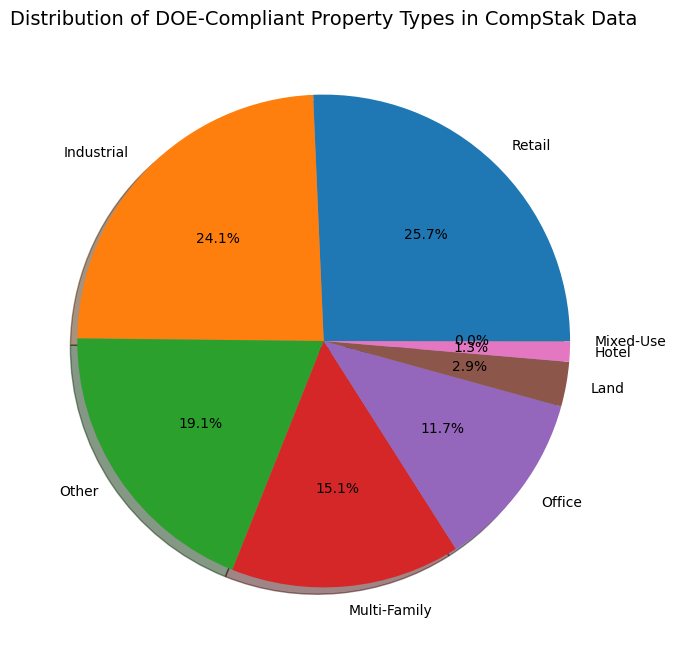

In [16]:
# Check the distribution of the new DOE-compliant property types
doe_compliant_counts = compstak_mapped_df['DOE_Compliant_Property_Type'].value_counts()
print("Distribution of DOE-compliant property types in CompStak data:")
print(doe_compliant_counts)

# Create a pie chart to visualize the distribution
plt.figure(figsize=(10, 8))
pie = doe_compliant_counts.plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Distribution of DOE-Compliant Property Types in CompStak Data', fontsize=14)
plt.ylabel('')
plt.savefig('../Images/plots/compstak_doe_compliant_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

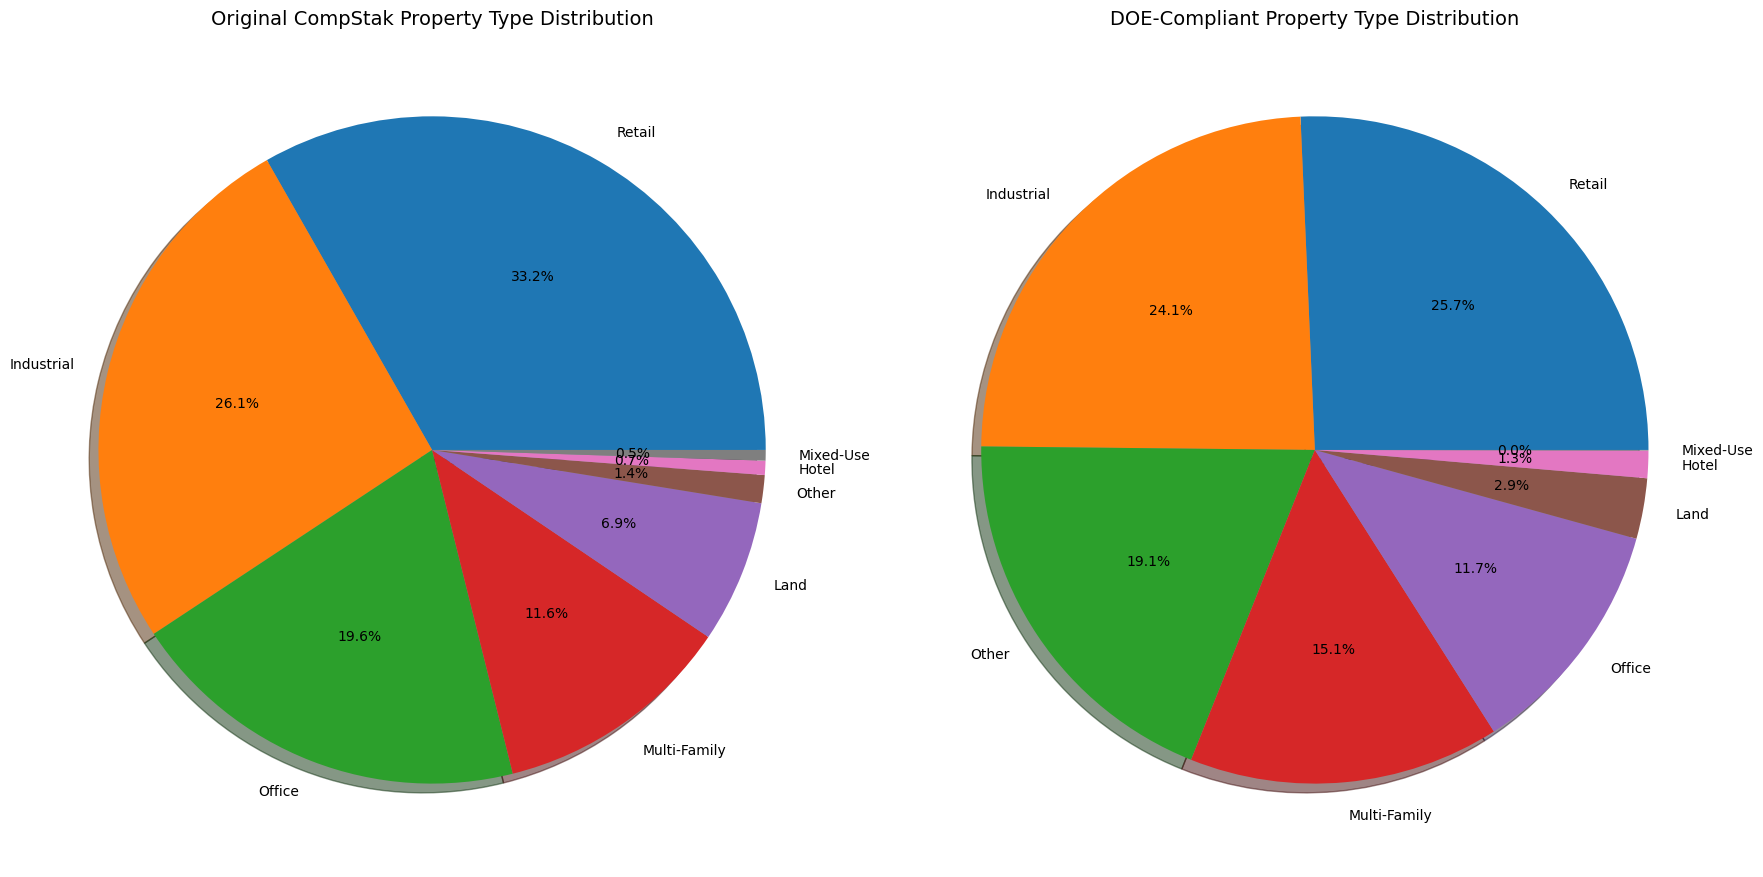


Numerical comparison between original and DOE-compliant property types:
              Original_CompStak  DOE_Compliant
Hotel                      4969          10068
Industrial               188239         183414
Land                      49983          22285
Mixed-Use                  3707            216
Multi-Family              84091         114432
Office                   141589          88848
Other                      9792         145244
Retail                   240233         195116


In [17]:
# Compare the distribution of the original property types vs. DOE-compliant property types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Original CompStak Property Types
compstak_type_counts = compstak_df['Property Type'].value_counts()
compstak_type_counts.plot.pie(ax=ax1, autopct='%1.1f%%', shadow=True)
ax1.set_title('Original CompStak Property Type Distribution', fontsize=14)
ax1.set_ylabel('')

# New DOE-compliant Property Types
doe_compliant_counts.plot.pie(ax=ax2, autopct='%1.1f%%', shadow=True)
ax2.set_title('DOE-Compliant Property Type Distribution', fontsize=14)
ax2.set_ylabel('')

plt.tight_layout()
plt.savefig('../Images/plots/compstak_original_vs_doe_compliant.png', dpi=300, bbox_inches='tight')
plt.show()

# Print numerical comparison
comparison_df = pd.DataFrame({
    'Original_CompStak': compstak_type_counts,
    'DOE_Compliant': doe_compliant_counts
})
comparison_df.fillna(0, inplace=True)
comparison_df = comparison_df.astype(int)
print("\nNumerical comparison between original and DOE-compliant property types:")
print(comparison_df)

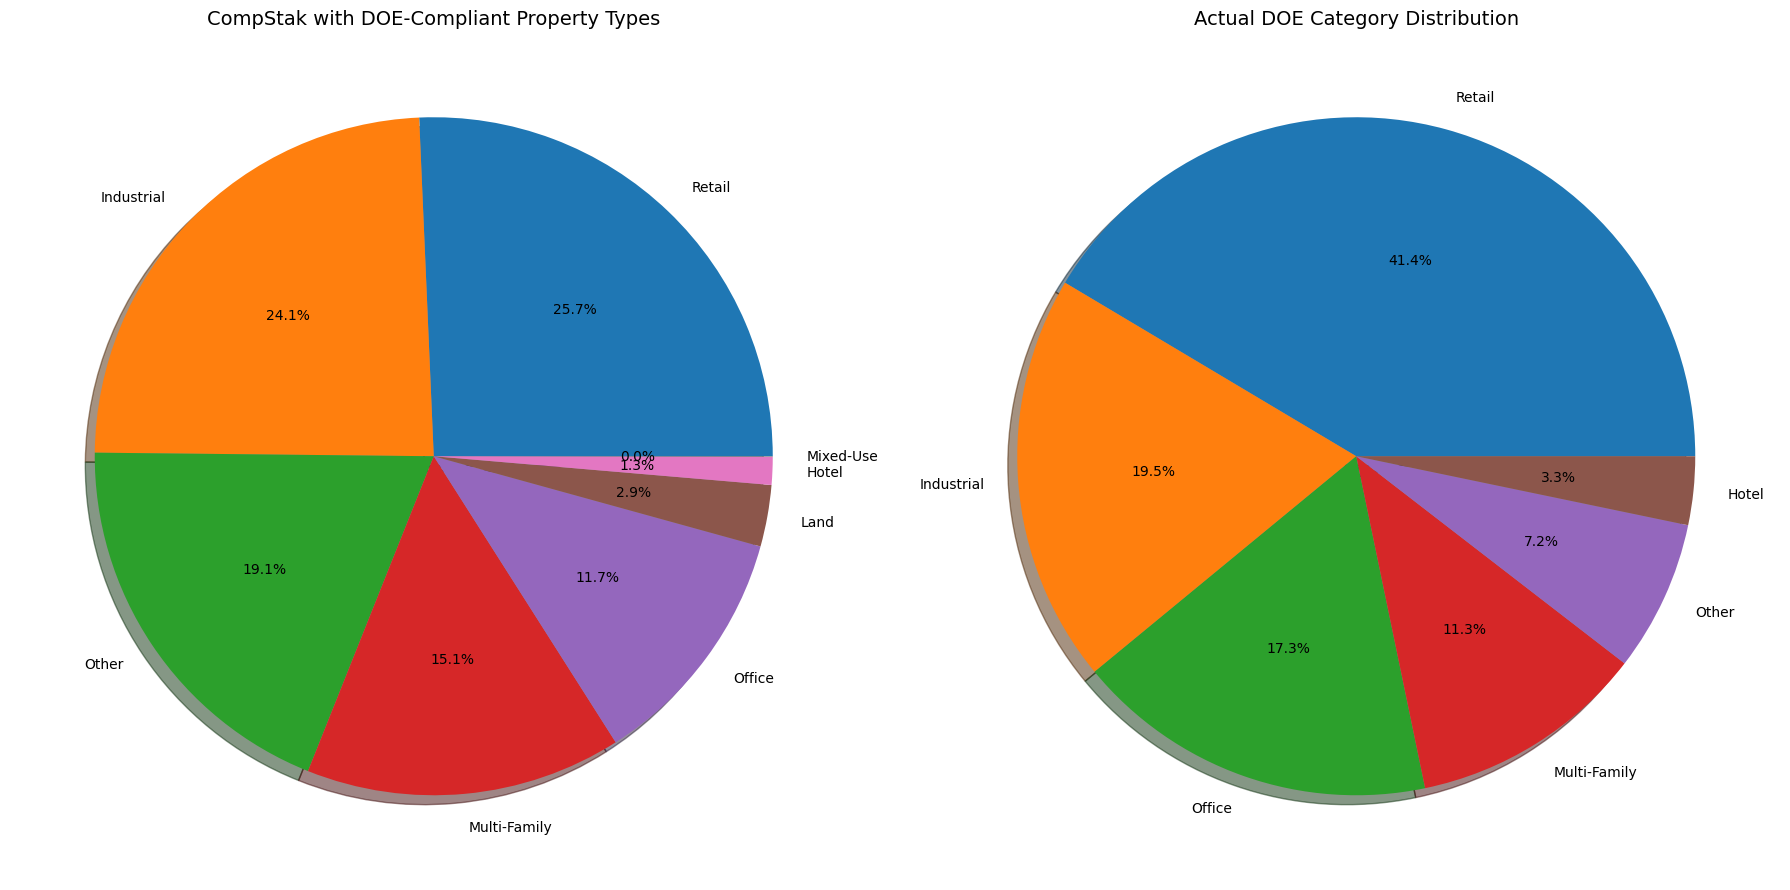


Numerical comparison between DOE-compliant CompStak and actual DOE categories:
              CompStak_DOE_Compliant  Actual_DOE
Hotel                          10068       73277
Industrial                    183414      438534
Land                           22285           0
Mixed-Use                        216           0
Multi-Family                  114432      253361
Office                         88848      388432
Other                         145244      161804
Retail                        195116      931077


In [18]:
# Now let's compare the DOE-compliant CompStak distribution with the actual DOE dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# DOE-compliant CompStak Property Types
doe_compliant_counts.plot.pie(ax=ax1, autopct='%1.1f%%', shadow=True)
ax1.set_title('CompStak with DOE-Compliant Property Types', fontsize=14)
ax1.set_ylabel('')

# Actual DOE Categories
doe_category_distribution = doe_df['compstak_equivalent_category'].value_counts()
doe_category_distribution.plot.pie(ax=ax2, autopct='%1.1f%%', shadow=True)
ax2.set_title('Actual DOE Category Distribution', fontsize=14)
ax2.set_ylabel('')

plt.tight_layout()
plt.savefig('../Images/plots/compstak_doe_compliant_vs_actual_doe.png', dpi=300, bbox_inches='tight')
plt.show()

# Print numerical comparison
comparison_df = pd.DataFrame({
    'CompStak_DOE_Compliant': doe_compliant_counts,
    'Actual_DOE': doe_category_distribution
})
comparison_df.fillna(0, inplace=True)
comparison_df = comparison_df.astype(int)
print("\nNumerical comparison between DOE-compliant CompStak and actual DOE categories:")
print(comparison_df)

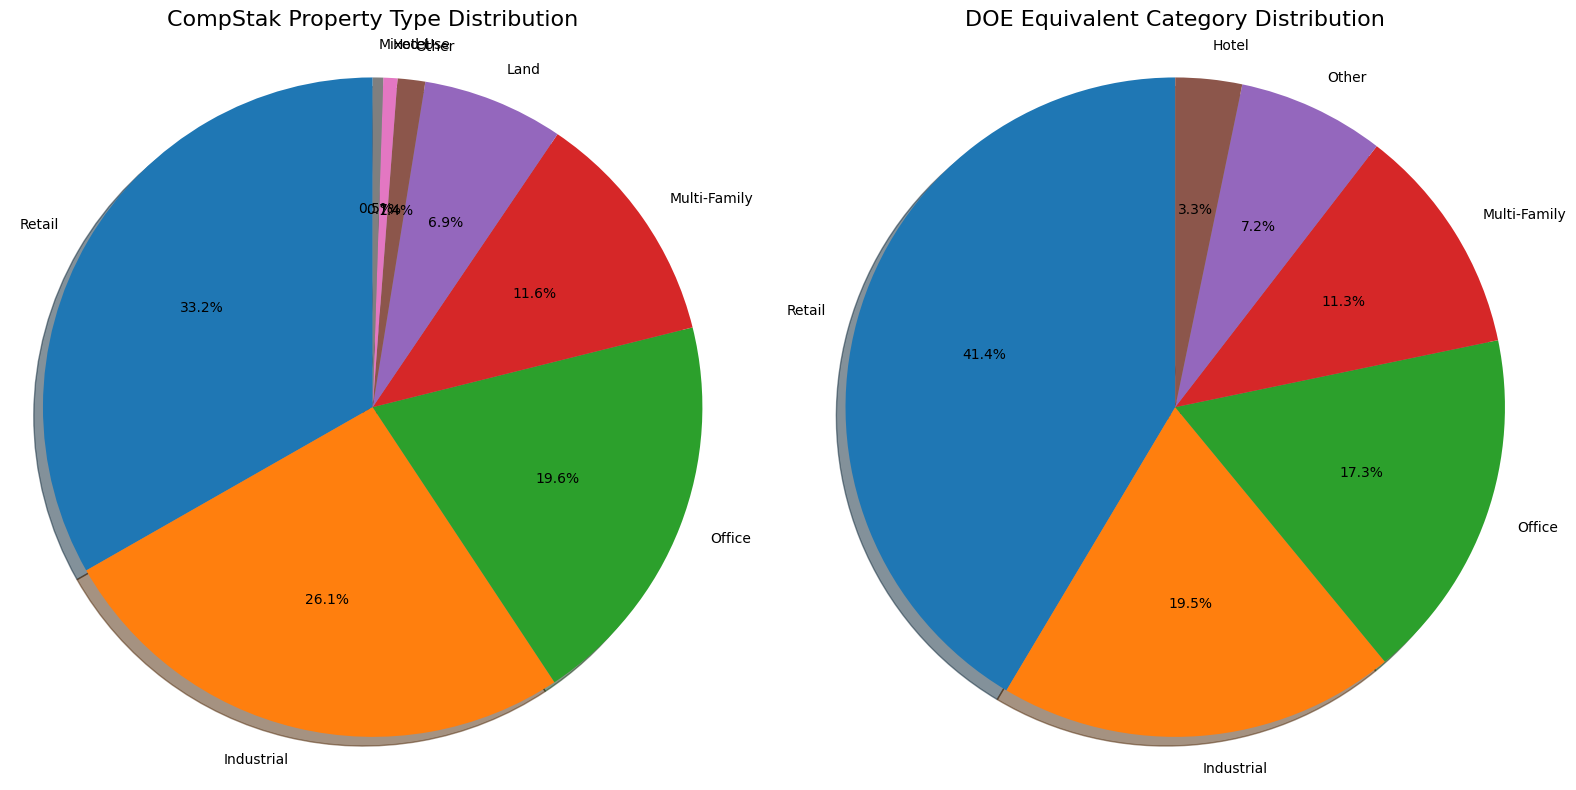

CompStak Property Type Distribution:
  Property Type   Count
0        Retail  240233
1    Industrial  188239
2        Office  141589
3  Multi-Family   84091
4          Land   49983
5         Other    9792
6         Hotel    4969
7     Mixed-Use    3707

DOE Equivalent Category Distribution:
       Category   Count
0        Retail  931077
1    Industrial  438534
2        Office  388432
3  Multi-Family  253361
4         Other  161804
5         Hotel   73277

Total CompStak properties: 722,603
Total DOE properties: 2,246,485


In [19]:
# Create side-by-side pie charts comparing CompStak Property Types and DOE equivalent categories

# Get counts for CompStak Property Type (excluding NaN values)
compstak_type_counts = compstak_df['Property Type'].value_counts().reset_index()
compstak_type_counts.columns = ['Property Type', 'Count']

# Get counts for DOE compstak_equivalent_category
doe_category_distribution = doe_df['compstak_equivalent_category'].value_counts().reset_index()
doe_category_distribution.columns = ['Category', 'Count']

# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# CompStak pie chart on the left
ax1.pie(compstak_type_counts['Count'], labels=compstak_type_counts['Property Type'], autopct='%1.1f%%', 
        startangle=90, shadow=True)
ax1.set_title('CompStak Property Type Distribution', fontsize=16)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# DOE equivalent categories pie chart on the right
ax2.pie(doe_category_distribution['Count'], labels=doe_category_distribution['Category'], autopct='%1.1f%%', 
        startangle=90, shadow=True)
ax2.set_title('DOE Equivalent Category Distribution', fontsize=16)
ax2.axis('equal')

plt.tight_layout()
plt.savefig('../Images/plots/compstak_vs_doe_categories_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the numerical comparison
print("CompStak Property Type Distribution:")
print(compstak_type_counts)
print("\nDOE Equivalent Category Distribution:")
print(doe_category_distribution)

# Calculate and print percentages
total_compstak = compstak_type_counts['Count'].sum()
total_doe = doe_category_distribution['Count'].sum()

print(f"\nTotal CompStak properties: {total_compstak:,}")
print(f"Total DOE properties: {total_doe:,}")